# Tarea de diferencias finitas para EDP

Eliana Bonalde
___
1. ¿Cómo podemos mejorar las funciones ECnL(), ED() y EB() para no tener que usar dos bucles anidados?


In [17]:
import numpy as np                    
import matplotlib.pyplot as plt

In [18]:
def ECnL_E(u, nx, nt = 25, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = 0.3 
    c = 1
    dt = sigma * dx / c 
    for n in range(nt): 
        un = u.copy()
        u[1:] = un[1:]- un[1:] * (dt / dx) * (un[1:] - un[:-1])
    return u

In [19]:
def ED_E(u, nx, nt = 20, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = 0.3 
    dt = sigma * dx**2 / nu 
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2])
    return u

In [20]:
def EB_E(u, nx, nt = 20, nu = 0.3):
    dx = 2 / (nx-1)
    sigma = 0.3 
    dt = sigma * dx**2 / nu 
    for n in range(nt):  
        u_der = np.roll(u,-1)
        u_izq = np.roll(u,1)
        u = u - u *dt / dx * (u -u_izq) + nu * dt / dx**2 * (u_izq - 2*u +u_der)
    return u

2. Implemente un código que permita, a partir de las funciones dadas, mostrar en una sola imagen
(3x3) que contenga, el dato inicial u_0(x, 0), el resultado de estudiar la ecuación lineal y el
resultado de estudiar la ecuación no lineal. Esto para nx = 21 nx = 41 y nx = 81, Describa
sus apreciaciones, y analice el porqué de los resultados obtenidos.

In [21]:
def ECL(u, nx, nt = 25):
    dx = 2 / (nx-1)
    sigma = .3 
    c = 1
    dt = sigma * dx / c 
    for n in range(nt): 
        un = u.copy()
        u[1:] = un[1:]- c * (dt / dx) * (un[1:] - un[:-1])
    return u

In [22]:
def f1(nx):
    dx = 2 / (nx-1)
    u = np.ones(nx)     
    u[int(.5 / dx):int(1 / dx + 1)] = 2  
    return u

def mostrar_imagen(u,nx):
    plt.plot(np.linspace(0, 2, nx), u);

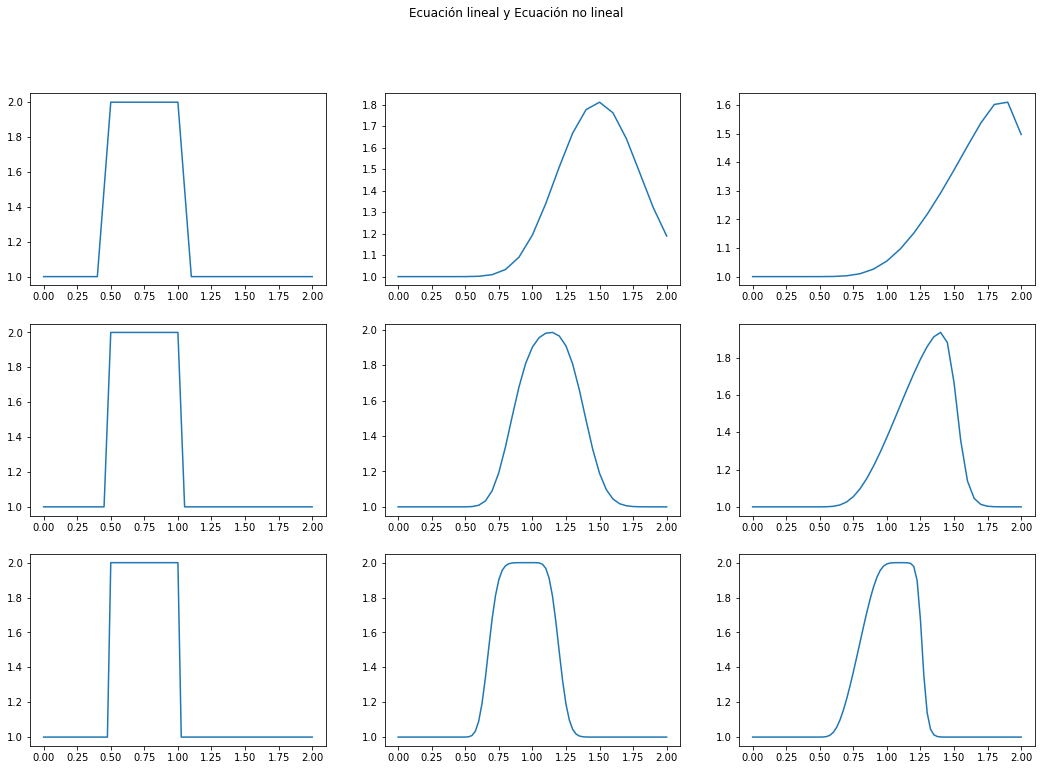

In [23]:
plt.figure(figsize=(18,12))
nx = 21
plt.subplot(3, 3, 1) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 2) 
mostrar_imagen(ECL(f1(nx),nx),nx)
plt.subplot(3, 3, 3) 
mostrar_imagen(ECnL_E(f1(nx),nx),nx)
nx = 41
plt.subplot(3, 3, 4) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 5) 
mostrar_imagen(ECL(f1(nx),nx),nx)
plt.subplot(3, 3, 6) 
mostrar_imagen(ECnL_E(f1(nx),nx),nx)
nx = 81
plt.subplot(3, 3, 7) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 8) 
mostrar_imagen(ECL(f1(nx),nx),nx)
plt.subplot(3, 3, 9) 
mostrar_imagen(ECnL_E(f1(nx),nx),nx)
plt.suptitle("Ecuación lineal y Ecuación no lineal")
plt.show()

En las comparaciones hechas anteriormente, tanto en la parte lineal como la no lineal, son
iguales, parecidos o totalmente diferentes los datos obtenidos, ¿por qué? Realice un trabajo
similar para la ecuación de difusión y la ecuación de Burgers. ¿Qué apreciaciones le
merece?

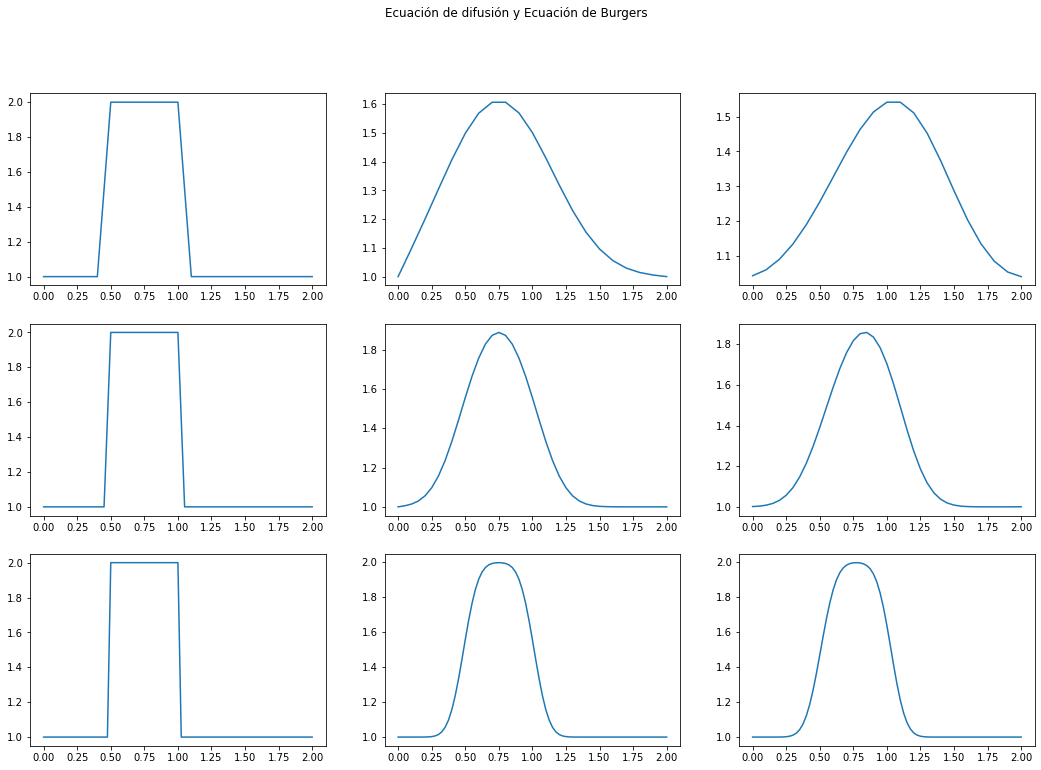

In [24]:
plt.figure(figsize=(18,12))
nx = 21
plt.subplot(3, 3, 1) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 2) 
mostrar_imagen(ED_E(f1(nx),nx),nx)
plt.subplot(3, 3, 3) 
mostrar_imagen(EB_E(f1(nx),nx),nx)
nx = 41
plt.subplot(3, 3, 4) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 5) 
mostrar_imagen(ED_E(f1(nx),nx),nx)
plt.subplot(3, 3, 6) 
mostrar_imagen(EB_E(f1(nx),nx),nx)
nx = 81
plt.subplot(3, 3, 7) 
mostrar_imagen(f1(nx),nx)
plt.subplot(3, 3, 8) 
mostrar_imagen(ED_E(f1(nx),nx),nx)
plt.subplot(3, 3, 9) 
mostrar_imagen(EB_E(f1(nx),nx),nx)
plt.suptitle("Ecuación de difusión y Ecuación de Burgers")
plt.show()